In [25]:
NAMES = ["Andrew Fidler",
         "Ryan Da Silva",
         "Mike Suderman",
         "Pavel Demin",
         "Saewan Koh",
         ]
GROUP = "4"

In [26]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.api as sm



In [27]:
# read data
on_df = pd.read_csv('1410037601_databaseLoadingData.csv')

# drop redundant columns
on_df = on_df[[
    'REF_DATE',
    'Class of worker',
    'North American Industry Classification System (NAICS)',
    'VALUE',
    'STATUS'
]]
# convert date column
on_df.REF_DATE = on_df.REF_DATE.astype('datetime64')

print(on_df.head())


    REF_DATE                         Class of worker  \
0 2014-10-01  Total employed, all classes of workers   
1 2014-11-01  Total employed, all classes of workers   
2 2014-12-01  Total employed, all classes of workers   
3 2015-01-01  Total employed, all classes of workers   
4 2015-02-01  Total employed, all classes of workers   

  North American Industry Classification System (NAICS)   VALUE STATUS  
0                     Total employed, all industries     6892.6    NaN  
1                     Total employed, all industries     6857.1    NaN  
2                     Total employed, all industries     6839.5    NaN  
3                     Total employed, all industries     6732.3    NaN  
4                     Total employed, all industries     6776.3    NaN  


In [31]:
# pivot table to show collected values
df_pivot = on_df.pivot(index=["REF_DATE"], 
            columns=["Class of worker", "North American Industry Classification System (NAICS)"],
            values="VALUE")

df_pivot

Class of worker                                       Total employed, all classes of workers  \
North American Industry Classification System (NAICS)         Total employed, all industries   
REF_DATE                                                                                       
2014-10-01                                                                            6892.6   
2014-11-01                                                                            6857.1   
2014-12-01                                                                            6839.5   
2015-01-01                                                                            6732.3   
2015-02-01                                                                            6776.3   
...                                                                                      ...   
2022-10-01                                                                            7755.8   
2022-11-01                                                                            7778.4   
2022-12-01                                                                            7797.4   
2023-01-01                                                                            7754.1   
2023-02-01                                                                            7790.1   

Class of worker                                                               \
North American Industry Classification System (NAICS) Goods-producing sector   
REF_DATE                                                                       
2014-10-01                                                            1423.4   
2014-11-01                                                            1415.3   
2014-12-01                                                            1379.1   
2015-01-01                                                            1329.2   
2015-02-01                                                            1338.9   
...                                                                      ...   
2022-10-01                                                            1561.3   
2022-11-01                                                            1564.2   
2022-12-01                                                            1552.7   
2023-01-01                                                            1522.0   
2023-02-01                                                            1529.9   

Class of worker                                                                               \
North American Industry Classification System (NAICS) Agriculture [111-112, 1100, 1151-1152]   
REF_DATE                                                                                       
2014-10-01                                                                              80.1   
2014-11-01                                                                              73.8   
2014-12-01                                                                              74.7   
2015-01-01                                                                              71.2   
2015-02-01                                                                              69.2   
...                                                                                      ...   
2022-10-01                                                                              72.6   
2022-11-01                                                                              75.0   
2022-12-01                                                                              78.1   
2023-01-01                                                                              73.4   
2023-02-01                                                                              71.9   

Class of worker                                                                                                                    \
North American Industry Classification System (NAICS) Fo

Text(0, 0.5, 'total (1000s)')

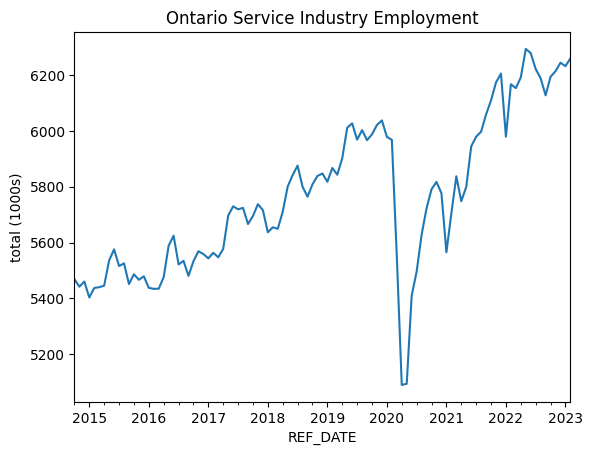

In [34]:
# just looking at all Service workers, regardless of sub-industry, self-employed status  
service_col = df_pivot['Total employed, all classes of workers','Services-producing sector']
gr = service_col.plot.line(title='Ontario Service Industry Employment')
gr.set_ylabel("total (1000s)")

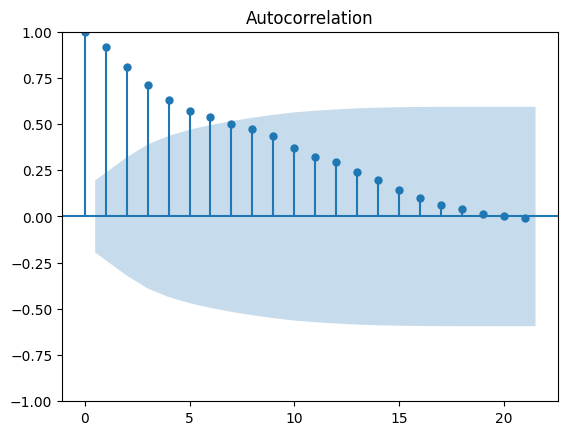

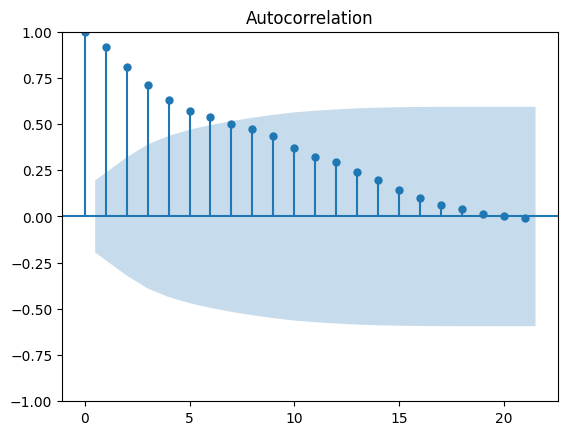

In [37]:
# need to review and clean autocorelation (seasonality)
from statsmodels.graphics.tsaplots import plot_acf
 
 
# plot the auto correlation
plot_acf(service_col)

<AxesSubplot: xlabel='REF_DATE'>

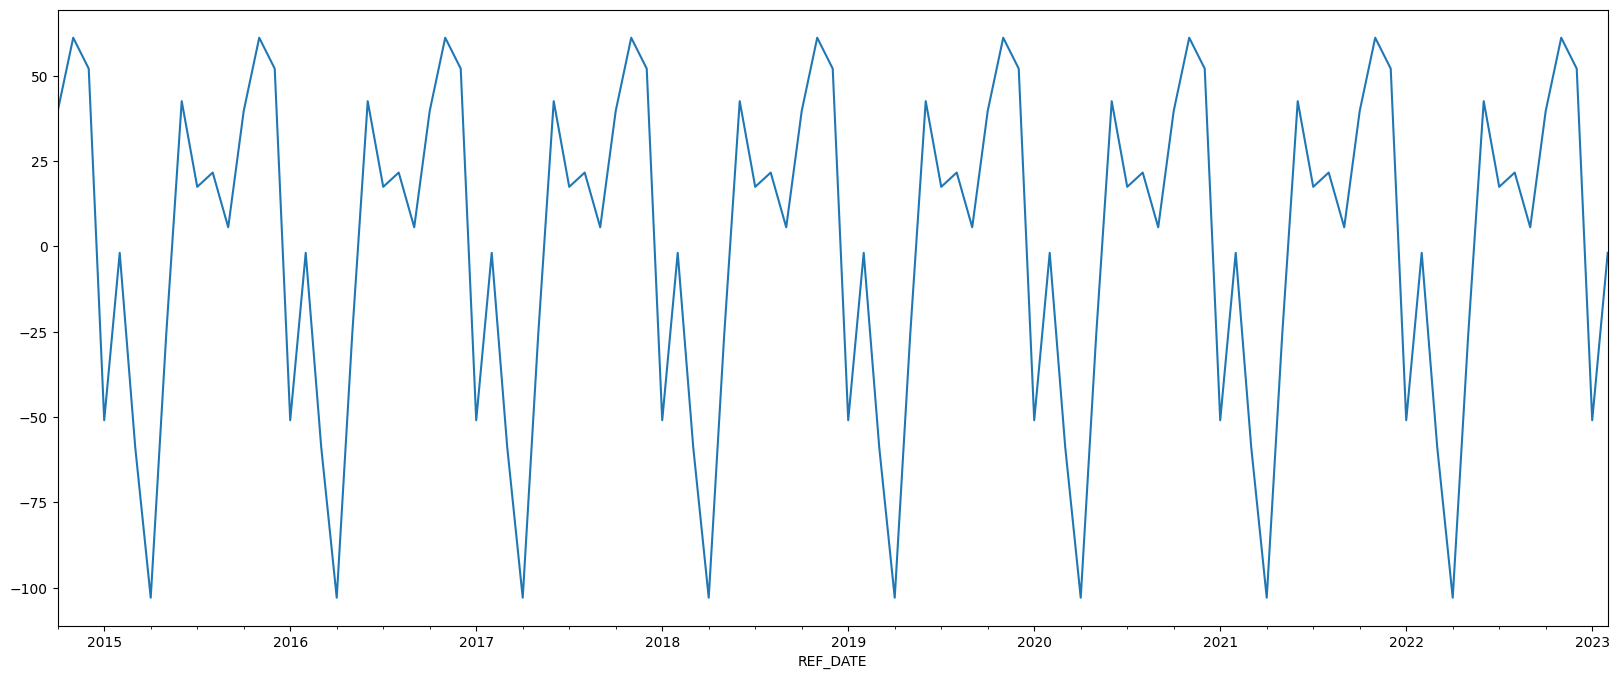

In [46]:
# creates seasonal graph
# TODO: compare run above but only with the prepandemic date range?

decomposition = sm.tsa.seasonal_decompose(service_col)
decomposition.seasonal.plot(figsize=(20, 8))

Text(0, 0.5, 'total (1000s)')

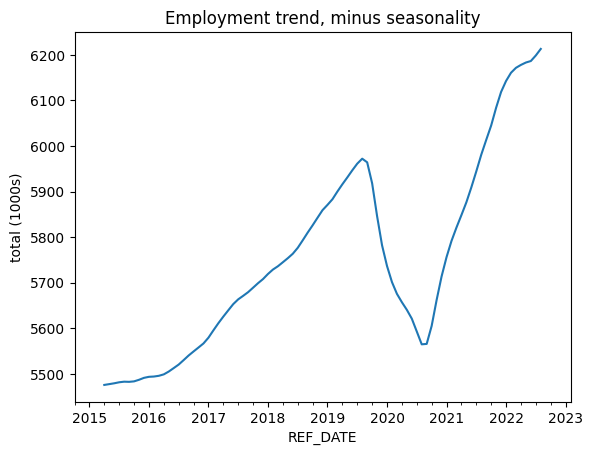

In [48]:
gr = decomposition.trend.plot(title='Employment trend, minus seasonality')
gr.set_ylabel("total (1000s)")